In [7]:
import os
import sys
import glob
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [68]:
#By default returns a dataframe with only successful songs. Complementary = True, return the complementary subset
def getSuccessfulSongs(df, colName, successType, complementary = False):
    successCol = 'e_'+successType
    #check if 1 when complementary == False, check 0 otherwise
    return df[df[successCol] == (1 - complementary)][colName]
    #TODO mirar si fer-ho amb query

def getTable(df, colName):
    return df[[colName, 'e_grammy']]

#draw all the 7 boxplots we require for each column
def drawAllBoxPlots(df, colName):

    sns.boxplot(x = 'e_grammy', y = colName, data = getTable(df, 'price'))

In [69]:
data = {'product_name': ['laptop', 'printer', 'tablet', 'desk', 'chair'],
        'price': [1200, 150, 300, 450, 200],
        'e_grammy': [1,1,0,0,1]
        }
df = pd.DataFrame(data)

priceDf = getSuccessfulSongs(df, 'price', 'grammy')
priceDf.describe()



count       3.000000
mean      516.666667
std       592.311855
min       150.000000
25%       175.000000
50%       200.000000
75%       700.000000
max      1200.000000
Name: price, dtype: float64

   price  e_grammy
0   1200         1
1    150         1
2    300         0
3    450         0
4    200         1


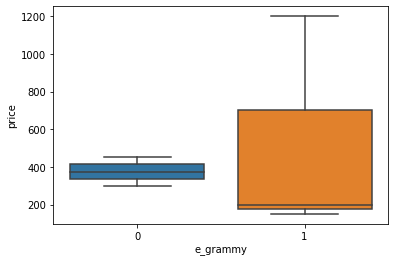

In [70]:
print(getTable(df, 'price'))
drawAllBoxPlots(df, 'price')